
# Lab 11 - NOR Gate - ANN

#### Author: Krishna Swaroop
#### 181CO125, NITK Surathkal

## 1) Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, sys

## 2) Sigmoid

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## 3) Weight Initialisation using ```np.rand``` 



Initialises random values for weights and biases

In [3]:
def initializeParameters(inputFeatures, HiddenLayer, outputFeatures):
    W1 = np.random.randn(HiddenLayer, inputFeatures)
    W2 = np.random.randn(outputFeatures, HiddenLayer)
    b1 = np.zeros((HiddenLayer, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters
  

## 4) Forward Propogation

In [4]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

## 5) Backward Propogation

In [5]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
      
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
      
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

## 6) Weight Updation

In [6]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Training

Here, we train the neural network for 1000 epochs

In [7]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[1, 0, 0, 0]]) # AND output

HiddenLayerNeurons = 2 
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0] 
parameters = initializeParameters(inputFeatures, HiddenLayerNeurons, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Analysis


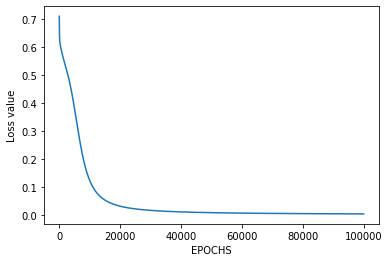

In [8]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()